In [195]:
import matplotlib.pyplot as plt
import numpy as np
import urllib
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from mpl_finance import candlestick2_ohlc
import datetime as dt

In [174]:
def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter

def graph_data(stock):
    
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)
    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y-%m-%d')})

                
        
    #handling unix time
#     date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
#                                                           delimiter=',',
#                                                           unpack=True)
#     dataconv = np.vectorize(dt.datatime.fromtimestamp)
#     date = dataconv(date)
    
    


    return date, closep


In [ ]:
#     plt.plot_date(date, closep,'-', label='Price')
 
#     plt.xlabel('Date')
#     plt.ylabel('Price')
#     plt.title('Interesting Graph\nCheck it out')
#     plt.legend()
#     plt.show()


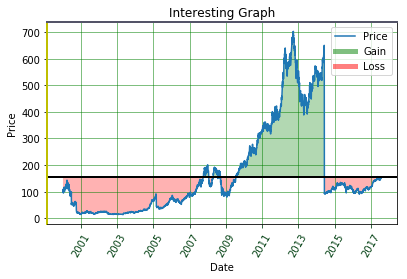

In [190]:
date, closep = graph_data('TSLA')

fig = plt.figure()
ax1 = plt.subplot2grid((1,1),(0,0))  # shape of grid , starting point of graph


ax1.plot_date(date, closep, '-', label='Price')
ax1.plot([],[], color='g', label="Gain", linewidth=5, alpha=0.5)
ax1.plot([],[], color='r', label="Loss", linewidth=5, alpha=0.5)

ax1.axhline(closep[0], color='k', linewidth=2)  #horizontal line at closep[0] value

ax1.fill_between(date, closep, closep[0], where=(closep > closep[0]), facecolor='g',alpha=0.3) #fill color, 3rd aurg
                                                                #for base point, condition, color alpha for opacity

ax1.fill_between(date, closep, closep[0], where=(closep < closep[0]), facecolor='r',alpha=0.3)
    
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(60)   #label rotate x axis
    
ax1.grid(True , color='g', linewidth=0.5)  #grid costumization

# ax1.xaxis.label.set_color('r')# set label color
# ax1.yaxis.label.set_color('b')

ax1.spines['left'].set_color('y')         # set spine color and width
ax1.spines['left'].set_linewidth(2)
ax1.spines['top'].set_color('#545468')
ax1.spines['top'].set_linewidth(2)

ax1.tick_params(axis='x', colors="#054215")  # x axis values color

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Interesting Graph')
plt.legend()
plt.subplots_adjust(left=0.09, bottom=.2,right=.9,top=.9, wspace=1)  #set subplot size
plt.show()